In [40]:
from astropy.io import fits
from astropy.table import Table
from astropy.wcs import WCS
import matplotlib.pyplot as plt
import  numpy as np

plt.rcParams.update({'font.size': 16})

In [7]:
# Read in the mock catalog
mock_cat = Table.read('Data_Repository/Project_Data/SPT-IRAGN/MCMC/Mock_Catalog/Catalogs/Port_Rebuild_Tests/eta_zeta_slopes/targeted_snr/308cl/snr_13/mock_AGN_catalog_t1.102_e4.00_z-1.00_b1.00_rc0.100_C0.158_maxr5.00_seed3775_308x1.0_photComp_tez_grid.fits')
mock_cat = mock_cat.group_by('SPT_ID')

In [47]:
# Find an average cluster
mean_z = mock_cat['REDSHIFT'].mean()
mean_redshift_bin = mock_cat[np.abs(mock_cat['REDSHIFT'] - mean_z) <= 0.1]
mean_m500 = mean_redshift_bin['M500'].mean()
average_clusters = mean_redshift_bin[np.abs(mean_redshift_bin['M500'] - mean_m500) <= 0.1e14]
average_clusters = average_clusters.group_by('SPT_ID')
average_clusters.groups.aggregate(np.mean)['SPT_ID', 'REDSHIFT', 'M500']

SPT_ID,REDSHIFT,M500
,,solMass
bytes12,float64,float64
SPT_Mock_091,0.7192000150680542,388778427042518.06
SPT_Mock_125,0.7265999913215637,384204707788531.25
SPT_Mock_142,0.8076000213623047,382494217421313.06
SPT_Mock_151,0.7116000056266785,391788063261983.94
SPT_Mock_179,0.7179999947547913,392174575480379.9
SPT_Mock_186,0.8026000261306763,381832982698224.06
SPT_Mock_272,0.7192,386895404834000.0
SPT_Mock_273,0.7192000000000002,386895404834000.0


In [60]:
mock_cluster = mock_cat.groups[142]
center = mock_cluster['SZ_RA', 'SZ_DEC'][0]
cluster_agn = mock_cluster[mock_cluster['CLUSTER_AGN'].astype(bool)]
background = mock_cluster[~mock_cluster['CLUSTER_AGN'].astype(bool)]

In [62]:
mask = mock_cluster['MASK_NAME'][0]
img, hdr = fits.getdata(mask, header=True)
wcs = WCS(hdr)

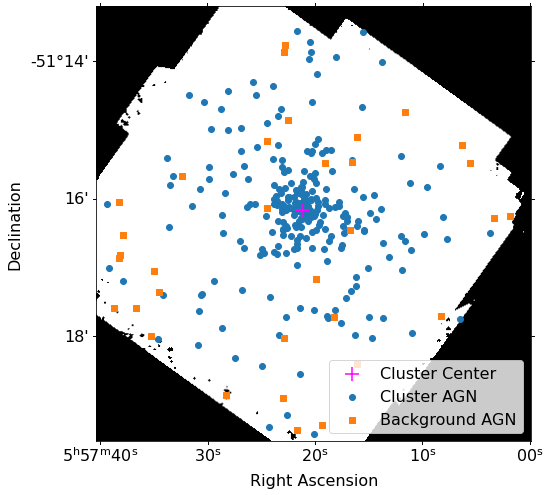

In [63]:
fig, ax = plt.subplots(subplot_kw=dict(projection=wcs), figsize=(8, 8))
ax.imshow(img, cmap='Greys_r', origin='lower')
ax.scatter(center['SZ_RA'], center['SZ_DEC'], marker='+', s=200, c='magenta', label='Cluster Center', transform=ax.get_transform('world'), zorder=5)
ax.scatter(cluster_agn['RA'], cluster_agn['DEC'], marker='o', c='tab:blue', label='Cluster AGN', transform=ax.get_transform('world'))
ax.scatter(background['RA'], background['DEC'], marker='s', c='tab:orange', label='Background AGN', transform=ax.get_transform('world'))
ax.legend()
ax.set(xlabel='Right Ascension', ylabel='Declination')
fig.savefig('Data_Repository/Project_Data/SPT-IRAGN/Publication_Plots/mock_cluster_example.png')